# Dataset importing

In [1]:
import pandas as pd
import numpy as np

In [2]:
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/test.csv
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/train.csv

--2023-07-26 18:58:54--  https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89724 (88K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]  87.62K  --.-KB/s    in 0.005s  

2023-07-26 18:58:54 (18.8 MB/s) - ‘test.csv’ saved [89724/89724]

--2023-07-26 18:58:54--  https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791227 (773K) [text/

In [3]:
train_set = pd.read_csv("/content/train.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)

test_set = pd.read_csv("/content/test.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)

In [4]:
print('Train dataset shap',train_set.shape)
print('Test dataset shap',test_set.shape)

Train dataset shap (11335, 2)
Test dataset shap (1260, 2)


In [5]:
print("Train datset :")
print(train_set.head())
print("\nTest datset :")
print(test_set.head())

Train datset :
                                               text  category
0          Trailer late ah parthavanga like podunga  Positive
1        Move pathutu vanthu trailer pakurvnga yaru  Positive
2          Puthupetai dhanush  ah yarellam pathinga  Positive
3  Dhanush oda character ,puthu sa erukay , mass ta  Positive
4  vera level ippa pesungada mokka nu thalaivaaaaaa  Positive

Test datset :
                                                text        category
0  Daily likes & views pakka vanthavaga ellarukum...        Positive
1  25 k dislikes ethuku da intha trailerku poi ap...        Negative
2                 #Lyca unna nenacha pavama iruku ya  Mixed_feelings
3            It looks like Hindi movie amitab bachan        Positive
4  Thalaivarukku nejamavey vayasaagiduchu... siva...        Positive


# Preprocess

In [6]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from tqdm import tqdm
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
def pre_clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [8]:
def remove_emoticon(text):
        text=str(text)

        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

In [9]:
def remove_punc(text):
    text=str(text)
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

In [10]:
def tokenize(tweet):
   tweet=str(tweet)

   return word_tokenize(tweet)

In [11]:
def remove_stop_words(tokens):
   clean_tokens = []
   newStopWords = ['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's', 'co','oru', 'enru', 'matrum', 'indha', 'idhu', 'enru', 'kondu', 'enpathu', 'pala', 'aagum', 'allathu', 'avar', 'naan', 'ullu', 'andha', 'ivar', 'ena', 'muthal', 'enna', 'irundhu', 'sila', 'en', 'pontu', 'venṭum', 'vandhu', 'ithan', 'athu', 'avan', 'thaan', 'palarum', 'ennum', 'melum', 'pinar', 'kondu', 'irukkum', 'thanathu', 'ullathu', 'pothu', 'enrum', 'athan', 'than', 'piragu', 'avargal', 'varai', 'aval', 'nee', 'aagiyathu', 'ullana', 'vandha', 'irundh', 'migavum', 'inggu', 'meethu', 'or', 'ivai', 'indha', 'ithaṉaḷ', 'patri', 'varum', 'veṟu', 'iru', 'ithil', 'pol', 'ippothu', 'avarathu', 'maṭṭum', 'indha', 'enuṁ', 'mel', 'pin', 'cernta', 'ākiyōr', 'enakku', 'innum', 'andha', 'anṟu', 'oṟe', 'miga', 'angu', 'palvēru', 'viṭṭu', 'perum', 'athai', 'paṟṟiya', 'uṉ', 'athik', 'andhak', 'pēr', 'indhaṉāḷ', 'avai', 'athe', 'ēn', 'muṟai', 'yār', 'eṉappaṭum', 'ellām', 'maṭṭumē', 'ingkē', 'angkē', 'iṭam', 'iṭattil', 'athil', 'nām', 'atharku', 'eṉavē', 'piṟa', 'siṟu', 'maṟṟa', 'viṭa', 'endha', 'eṉavum', 'eṉappuṭum', 'eṉiṉum', 'aṭutta', 'ithanai', 'ithai', 'koḷḷa', 'indhath', 'ithaṉāl', 'athāl', 'thavira', 'pol', 'varail', 'caṟṟu', 'eṉak']
   stopWords = stopwords.words('english')
   stopWords.append(newStopWords)
  #  print(stopWords)

   for token in tokens:
       if token not in stopWords:
           if token.replace(' ', '') != '':
               if len(token) > 1:
                   clean_tokens.append(token)
   return clean_tokens

In [12]:
def stem_and_lem(tokens):
   clean_tokens = []
   for token in tokens:
       token = wordnet_lemmatizer.lemmatize(token)
       token = lancaster_stemmer.stem(token)
       if len(token) > 1:
           clean_tokens.append(token)
   return ' '.join(clean_tokens)


In [13]:
def dataclean(data):
  tqdm.pandas(desc="Remove duplicates ")
  data.drop_duplicates(subset=['text'], inplace=True)
  tqdm.pandas(desc="To lower letter")
  data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

  tqdm.pandas(desc="Cleaning Data Phase I...")
  data['pre_clean_text'] = data['text'].progress_apply(pre_clean_text)

  tqdm.pandas(desc="removing emoji...")
  data['remove_emoticon'] = data['pre_clean_text'].progress_apply(remove_emoticon)


  tqdm.pandas(desc="removing punctuation...")
  data['remove_punc'] = data['remove_emoticon'].progress_apply(remove_punc)



  tqdm.pandas(desc="Tokenizing Data...")
  data['tokenize'] = data['remove_punc'].progress_apply(tokenize)

  tqdm.pandas(desc="Cleaning Data Phase II...")
  data['remove_stop_words'] = data['tokenize'].progress_apply(remove_stop_words)

  tqdm.pandas(desc="Stemming And Lemmatizing")
  data['stem_and_lem'] = data['remove_stop_words'].progress_apply(stem_and_lem)
  tqdm.pandas(desc="Cleaning Data Phase III...")

  data.drop(data[(data['category'] == 'unknown_state') | (data['category'] == 'not-tamil') |  (data['category'] == 'mixed_feelings')].index, inplace=True)
  # data.drop(data[(data['category'] == 'unknown_state') | (data['category'] == 'not-tamil') |(data['category'] == 'non-tamil') |  (data['category'] == 'mixed_feelings')].index, inplace=True)
  # data.drop(data[(data['category'] == 'mixed_feelings')].index, inplace=True)
  # replacement_dict = {
  #     'positive': 0,
  #     'negative': 1,
  #     'mixed_feelings':-1,
  # }
  # # Replace values in the DataFrame
  # data['category'].replace(replacement_dict, inplace=True)


  # stem_and_lem ---> outlet
  return data

In [14]:
train_set = dataclean(train_set)
train_set

Stemming And Lemmatizing: 100%|██████████| 11237/11237 [00:12<00:00, 913.12it/s] 


,text,category,pre_clean_text,remove_emoticon,remove_punc,tokenize,remove_stop_words,stem_and_lem
0,trailer late ah parthavanga like podunga,positive,trailer late ah parthavanga like podunga,trailer late ah parthavanga like podunga,trailer late ah parthavanga like podunga,"[trailer, late, ah, parthavanga, like, podunga]","[trailer, late, ah, parthavanga, like, podunga]",trail lat ah parthavang lik podung
1,move pathutu vanthu trailer pakurvnga yaru,positive,move pathutu vanthu trailer pakurvnga yaru,move pathutu vanthu trailer pakurvnga yaru,move pathutu vanthu trailer pakurvnga yaru,"[move, pathutu, vanthu, trailer, pakurvnga, yaru]","[move, pathutu, vanthu, trailer, pakurvnga, yaru]",mov pathutu vanthu trail pakurvng yaru
2,puthupetai dhanush ah yarellam pathinga,positive,puthupetai dhanush ah yarellam pathinga,puthupetai dhanush ah yarellam pathinga,puthupetai dhanush ah yarellam pathinga,"[puthupetai, dhanush, ah, yarellam, pathinga]","[puthupetai, dhanush, ah, yarellam, pathinga]",puthupeta dhanush ah yarellam pathing
3,"dhanush oda character ,puthu sa erukay , mass ta",positive,"dhanush oda character ,puthu sa erukay , mass ta","dhanush oda character ,puthu sa erukay , mass ta",dhanush oda character puthu sa erukay mass ta,"[dhanush, oda, character, puthu, sa, erukay, m...","[dhanush, oda, character, puthu, sa, erukay, m...",dhanush od charact puthu sa erukay mass ta
4,vera level ippa pesungada mokka nu thalaivaaaaaa,positive,vera level ippa pesungada mokka nu thalaivaaaaaa,vera level ippa pesungada mokka nu thalaivaaaaaa,vera level ippa pesungada mokka nu thalaivaaaaaa,"[vera, level, ippa, pesungada, mokka, nu, thal...","[vera, level, ippa, pesungada, mokka, nu, thal...",ver level ipp pesungad mokk nu thalaivaaaaa
...,...,...,...,...,...,...,...,...
11328,shankar anna and ar sir sema mass,positive,shankar anna and ar sir sema mass,shankar anna and ar sir sema mass,shankar anna and ar sir sema mass,"[shankar, anna, and, ar, sir, sema, mass]","[shankar, anna, ar, sir, sema, mass]",shank ann ar sir sem mass
11329,intha movie la yuvan music therikum pola thonu...,positive,intha movie la yuvan music therikum pola thonu...,intha movie la yuvan music therikum pola thonu...,intha movie la yuvan music therikum pola thonu...,"[intha, movie, la, yuvan, music, therikum, pol...","[intha, movie, la, yuvan, music, therikum, pol...",inth movy la yuv mus therik pol thonuthu enaku
11330,yuvan shankar raja anna fan's like here...,positive,yuvan shankar raja anna fan's like here...,yuvan shankar raja anna fan's like here...,yuvan shankar raja anna fans like here,"[yuvan, shankar, raja, anna, fans, like, here]","[yuvan, shankar, raja, anna, fans, like]",yuv shank raj ann fan lik
11331,a masterpiece best revenge film i’ve ever scene,positive,a masterpiece best revenge film i’ve ever scene,a masterpiece best revenge film i’ve ever scene,a masterpiece best revenge film i’ve ever scene,"[a, masterpiece, best, revenge, film, i, ’, ve...","[masterpiece, best, revenge, film, ever, scene]",masterpiec best reveng film ev scen


In [15]:
test_set = dataclean(test_set)
test_set

Stemming And Lemmatizing: 100%|██████████| 1257/1257 [00:00<00:00, 1305.47it/s]


,text,category,pre_clean_text,remove_emoticon,remove_punc,tokenize,remove_stop_words,stem_and_lem
0,daily likes & views pakka vanthavaga ellarukum...,positive,daily likes & views pakka vanthavaga ellarukum...,daily likes & views pakka vanthavaga ellarukum...,daily likes views pakka vanthavaga ellarukum ...,"[daily, likes, views, pakka, vanthavaga, ellar...","[daily, likes, views, pakka, vanthavaga, ellar...",dai lik view pakk vanthavag ellaruk vanakkam
1,25 k dislikes ethuku da intha trailerku poi ap...,negative,25 k dislikes ethuku da intha trailerku poi ap...,25 k dislikes ethuku da intha trailerku poi ap...,25 k dislikes ethuku da intha trailerku poi ap...,"[25, k, dislikes, ethuku, da, intha, trailerku...","[25, dislikes, ethuku, da, intha, trailerku, p...",25 dislik ethuku da inth trailerku poi apd ung...
3,it looks like hindi movie amitab bachan,positive,it looks like hindi movie amitab bachan,it looks like hindi movie amitab bachan,it looks like hindi movie amitab bachan,"[it, looks, like, hindi, movie, amitab, bachan]","[looks, like, hindi, movie, amitab, bachan]",look lik hind movy amitab bach
4,thalaivarukku nejamavey vayasaagiduchu... siva...,positive,thalaivarukku nejamavey vayasaagiduchu... siva...,thalaivarukku nejamavey vayasaagiduchu... siva...,thalaivarukku nejamavey vayasaagiduchu sivaji ...,"[thalaivarukku, nejamavey, vayasaagiduchu, siv...","[thalaivarukku, nejamavey, vayasaagiduchu, siv...",thalaivarukku nejamavey vayasaagiduchu sivaj t...
5,thala nu sollu thala nemirinthu nillu,positive,thala nu sollu thala nemirinthu nillu,thala nu sollu thala nemirinthu nillu,thala nu sollu thala nemirinthu nillu,"[thala, nu, sollu, thala, nemirinthu, nillu]","[thala, nu, sollu, thala, nemirinthu, nillu]",thal nu sollu thal nemirinthu nillu
...,...,...,...,...,...,...,...,...
1254,earphone la u1 bgm kekum pothu vera level,positive,earphone la u1 bgm kekum pothu vera level,earphone la u1 bgm kekum pothu vera level,earphone la u1 bgm kekum pothu vera level,"[earphone, la, u1, bgm, kekum, pothu, vera, le...","[earphone, la, u1, bgm, kekum, pothu, vera, le...",earphon la u1 bgm kek pothu ver level
1255,sappypathy vijayamma bigilu ummpi get more dis...,negative,sappypathy vijayamma bigilu ummpi get more dis...,sappypathy vijayamma bigilu ummpi get more dis...,sappypathy vijayamma bigilu ummpi get more dis...,"[sappypathy, vijayamma, bigilu, ummpi, get, mo...","[sappypathy, vijayamma, bigilu, ummpi, get, di...",sappypathy vijayamm bigilu ummp get dislik tar...
1256,stylea erukana ha ha naturally,positive,stylea erukana ha ha naturally,stylea erukana ha ha naturally,stylea erukana ha ha naturally,"[stylea, erukana, ha, ha, naturally]","[stylea, erukana, ha, ha, naturally]",style erukan ha ha nat
1257,style la irukana hahaha mass dialogue,negative,style la irukana hahaha mass dialogue,style la irukana hahaha mass dialogue,style la irukana hahaha mass dialogue,"[style, la, irukana, hahaha, mass, dialogue]","[style, la, irukana, hahaha, mass, dialogue]",styl la irukan hahah mass dialog


#Feature Extraction

In [16]:
# target Value
y_train = train_set['category']
y_test = test_set['category']

##Bag of word

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(train_set['stem_and_lem'])
X_test_bow = vectorizer.transform(test_set['stem_and_lem'])

In [19]:
X_train_bow , X_test_bow

(<8993x14348 sparse matrix of type '<class 'numpy.int64'>'
 	with 66038 stored elements in Compressed Sparse Row format>,
 <1019x14348 sparse matrix of type '<class 'numpy.int64'>'
 	with 6377 stored elements in Compressed Sparse Row format>)

## TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_trainTF_IDF = vectorizer.fit_transform(train_set['stem_and_lem'])
X_testTF_IDF = vectorizer.transform(test_set['stem_and_lem'])

In [21]:
X_trainTF_IDF , X_testTF_IDF #csr

(<8993x14348 sparse matrix of type '<class 'numpy.float64'>'
 	with 66038 stored elements in Compressed Sparse Row format>,
 <1019x14348 sparse matrix of type '<class 'numpy.float64'>'
 	with 6377 stored elements in Compressed Sparse Row format>)

In [22]:
print(X_trainTF_IDF)

  (0, 9094)	0.36003335008827714
  (0, 5765)	0.2124626497986085
  (0, 8588)	0.599020005874489
  (0, 938)	0.3038432473626021
  (0, 5683)	0.5554319471022834
  (0, 12247)	0.2560962221455208
  (1, 14027)	0.38057368142283293
  (1, 8134)	0.5667044487908944
  (1, 12912)	0.38940158254742296
  (1, 8738)	0.38631289632287186
  (1, 6538)	0.4378378404409478
  (1, 12247)	0.20355962234953262
  (2, 8690)	0.5164218046040746
  (2, 14015)	0.448462008257735
  (2, 2397)	0.3142956226001288
  (2, 9739)	0.6056335312111369
  (2, 938)	0.258101984428707
  (3, 11274)	0.35650600573393865
  (3, 6196)	0.15741536702606299
  (3, 3038)	0.47839836168549066
  (3, 10062)	0.40194150407945234
  (3, 9737)	0.42255253653116476
  (3, 2017)	0.37948179296412915
  (3, 7414)	0.27112465329775576
  (3, 2397)	0.24826648986250507
  :	:
  (8989, 6713)	0.3240403553886455
  (8989, 2788)	0.39972511596922716
  (8989, 9202)	0.297124342188536
  (8989, 14245)	0.30226721761299996
  (8989, 3931)	0.2739542244824918
  (8989, 5652)	0.224611931584475

#Model


In [33]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
def show_confusion_matrix(matrixs):
  plt.figure(figsize=(8, 6))
  sns.heatmap(matrixs, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix - SVM Classifier')
  plt.show()

##TF-IDF

In [24]:
k_best = 500
selector = SelectKBest(chi2, k=k_best)
X_train_tfidf_fs = selector.fit_transform(X_trainTF_IDF, y_train)
X_test_tfidf_fs = selector.transform(X_testTF_IDF)


Bernoulli NB Accuracy with TF-IDF : 0.84

Bernoulli NB Classification Report with TF-IDF:
              precision    recall  f1-score   support

    negative       0.52      0.22      0.31       164
    positive       0.87      0.96      0.91       855

    accuracy                           0.84      1019
   macro avg       0.69      0.59      0.61      1019
weighted avg       0.81      0.84      0.81      1019


Bernoulli NB Confusion Matrix with TF-IDF:


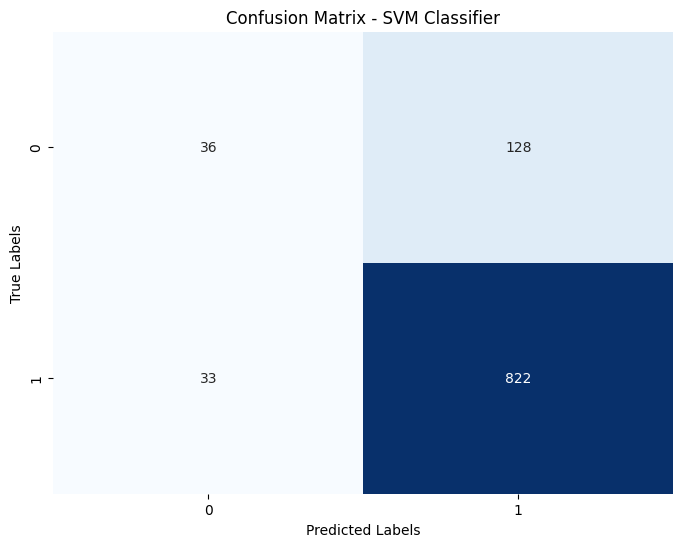

None



SVM Accuracy TF-IDF : 0.84

SVM Classification Report TF-IDF:
              precision    recall  f1-score   support

    negative       0.53      0.05      0.10       164
    positive       0.85      0.99      0.91       855

    accuracy                           0.84      1019
   macro avg       0.69      0.52      0.51      1019
weighted avg       0.79      0.84      0.78      1019


SVM Confusion Matrix TF-IDF:


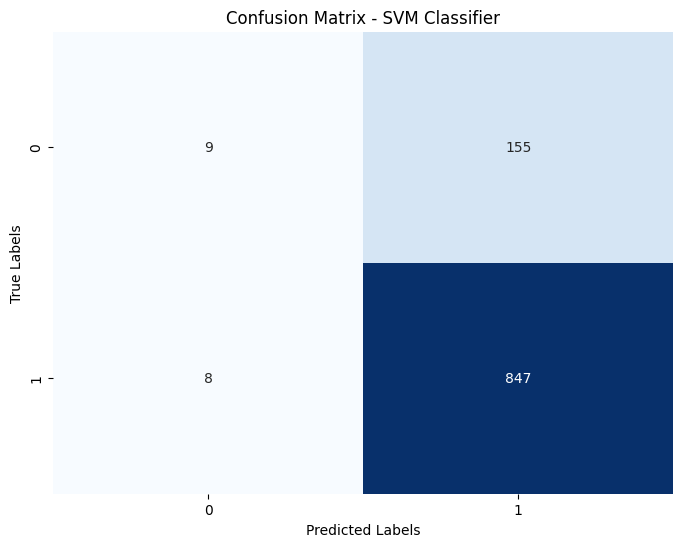

None



LR Accuracy TF-IDF: 0.84

LR Classification Report TF-IDF:
              precision    recall  f1-score   support

    negative       0.69      0.05      0.10       164
    positive       0.85      1.00      0.91       855

    accuracy                           0.84      1019
   macro avg       0.77      0.53      0.51      1019
weighted avg       0.82      0.84      0.78      1019


LR Confusion Matrix TF-IDF:


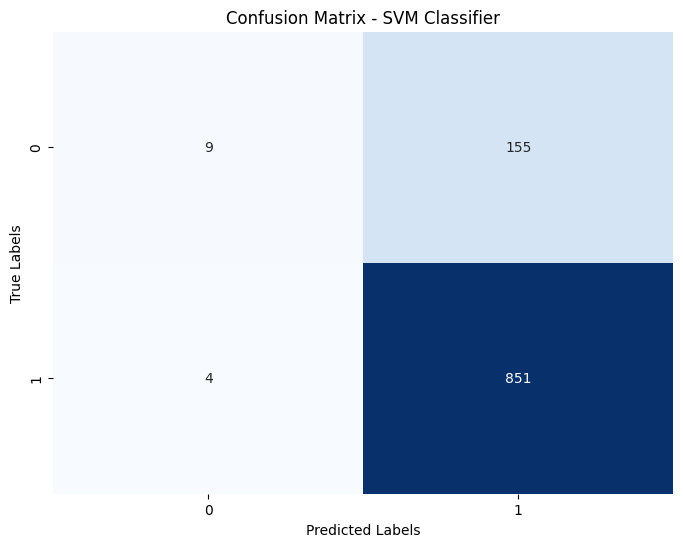

None



KNN Accuracy TF-IDF: 0.83

KNN Classification Report with TF-IDF
              precision    recall  f1-score   support

    negative       0.43      0.09      0.15       164
    positive       0.85      0.98      0.91       855

    accuracy                           0.83      1019
   macro avg       0.64      0.53      0.53      1019
weighted avg       0.78      0.83      0.79      1019


KNN Confusion Matrix with TF-IDF:


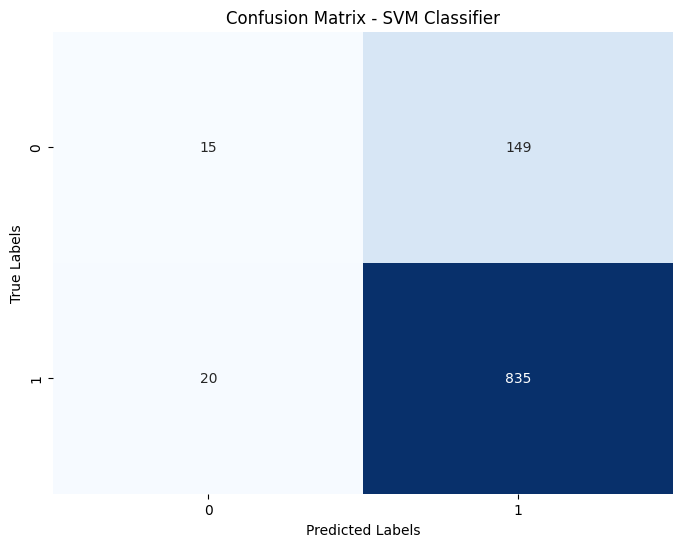

None


In [38]:
#Bernoulli NB
bernoulli_nb_classifier = BernoulliNB()
bernoulli_nb_classifier.fit(X_train_tfidf_fs, y_train)
bernoulli_nb_predictions = bernoulli_nb_classifier.predict(X_test_tfidf_fs)

bernoulli_nb_accuracy = accuracy_score(y_test, bernoulli_nb_predictions)
print(f"Bernoulli NB Accuracy with TF-IDF : {bernoulli_nb_accuracy:.2f}")
print("\nBernoulli NB Classification Report with TF-IDF:")
print(classification_report(y_test, bernoulli_nb_predictions))
print("\nBernoulli NB Confusion Matrix with TF-IDF:")
print(show_confusion_matrix(confusion_matrix(y_test, bernoulli_nb_predictions)))
print("\n\n")

#SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf_fs, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf_fs)

svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy TF-IDF : {svm_accuracy:.2f}")
print("\nSVM Classification Report TF-IDF:")
print(classification_report(y_test, svm_predictions))
print("\nSVM Confusion Matrix TF-IDF:")
print(show_confusion_matrix(confusion_matrix(y_test, svm_predictions)))
print("\n\n")

#LR
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train_tfidf_fs, y_train)
logistic_regression_predictions = logistic_regression_classifier.predict(X_test_tfidf_fs)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print(f"LR Accuracy TF-IDF: {logistic_regression_accuracy:.2f}")
print("\nLR Classification Report TF-IDF:")
print(classification_report(y_test, logistic_regression_predictions))
print("\nLR Confusion Matrix TF-IDF:")
print(show_confusion_matrix(confusion_matrix(y_test, logistic_regression_predictions)))
print("\n\n")

# KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed
knn_classifier.fit(X_train_tfidf_fs, y_train)
knn_predictions = knn_classifier.predict(X_test_tfidf_fs)

knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy TF-IDF: {knn_accuracy:.2f}")
print("\nKNN Classification Report with TF-IDF")
print(classification_report(y_test, knn_predictions))
print("\nKNN Confusion Matrix with TF-IDF:")
print(show_confusion_matrix((confusion_matrix(y_test, knn_predictions))))


##BOW

In [39]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
k_best = 500
selector = SelectKBest(chi2, k=k_best)
X_train_bow_fs = selector.fit_transform(X_train_bow, y_train)
X_test_bow_fs = selector.transform(X_test_bow)

# # SVM
# svm_classifier = SVC(kernel='linear')
# svm_classifier.fit(X_train_bow_fs, y_train)

# svm_predictions = svm_classifier.predict(X_test_bow_fs)

# svm_accuracy = accuracy_score(y_test, svm_predictions)

# print(f"SVM Accuracy: {svm_accuracy:.2f}")
# print(classification_report(y_test, svm_predictions))


Bernoulli NB Accuracy with BOW : 0.83

Bernoulli NB Classification Report with BOW:
              precision    recall  f1-score   support

    negative       0.47      0.24      0.32       164
    positive       0.87      0.95      0.91       855

    accuracy                           0.83      1019
   macro avg       0.67      0.60      0.61      1019
weighted avg       0.80      0.83      0.81      1019


Bernoulli NB Confusion Matrix with BOW:


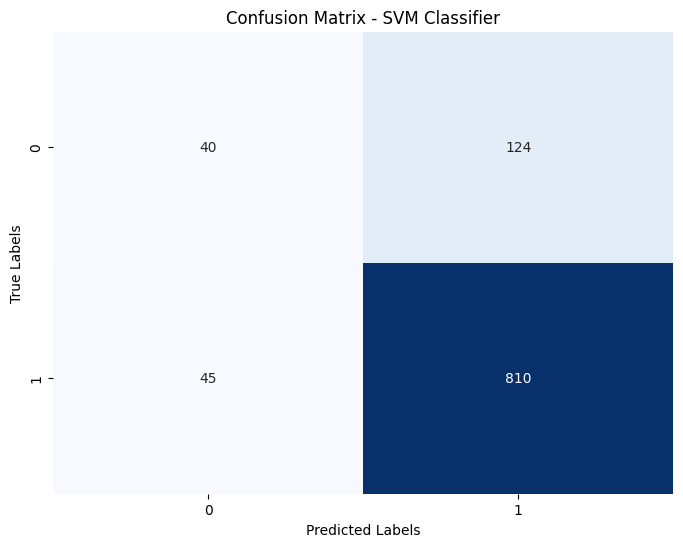

None



SVM Accuracy BOW : 0.83

SVM Classification Report BOW:
              precision    recall  f1-score   support

    negative       0.44      0.14      0.21       164
    positive       0.85      0.97      0.91       855

    accuracy                           0.83      1019
   macro avg       0.65      0.55      0.56      1019
weighted avg       0.79      0.83      0.80      1019


SVM Confusion Matrix BOW:


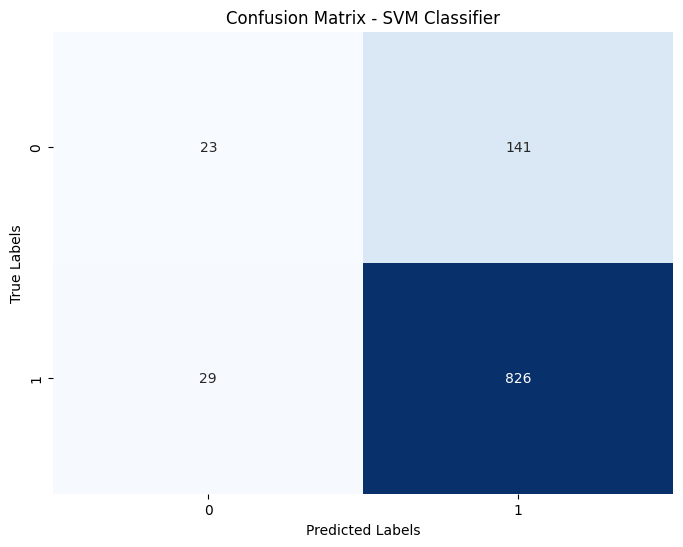

None



LR Accuracy BOW: 0.84

LR Classification Report BOW:
              precision    recall  f1-score   support

    negative       0.56      0.15      0.24       164
    positive       0.86      0.98      0.91       855

    accuracy                           0.84      1019
   macro avg       0.71      0.56      0.58      1019
weighted avg       0.81      0.84      0.80      1019


LR Confusion Matrix BOW:


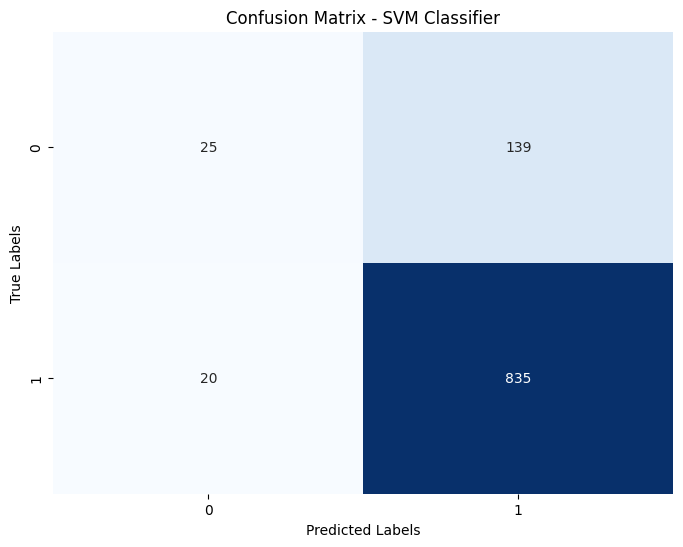

None



KNN Accuracy BOW: 0.83

KNN Classification Report with BOW
              precision    recall  f1-score   support

    negative       0.42      0.08      0.13       164
    positive       0.85      0.98      0.91       855

    accuracy                           0.83      1019
   macro avg       0.63      0.53      0.52      1019
weighted avg       0.78      0.83      0.78      1019


KNN Confusion Matrix with BOW:


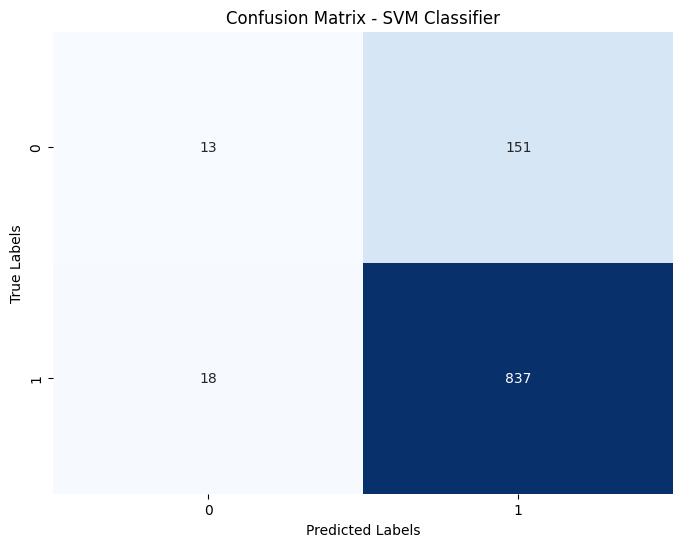

None


In [41]:

#Bernoulli NB
bernoulli_nb_classifier = BernoulliNB()
bernoulli_nb_classifier.fit(X_train_bow_fs, y_train)
bernoulli_nb_predictions = bernoulli_nb_classifier.predict(X_test_bow_fs)

bernoulli_nb_accuracy = accuracy_score(y_test, bernoulli_nb_predictions)
print(f"Bernoulli NB Accuracy with BOW : {bernoulli_nb_accuracy:.2f}")
print("\nBernoulli NB Classification Report with BOW:")
print(classification_report(y_test, bernoulli_nb_predictions))
print("\nBernoulli NB Confusion Matrix with BOW:")
print(show_confusion_matrix(confusion_matrix(y_test, bernoulli_nb_predictions)))
print("\n\n")

#SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_bow_fs, y_train)
svm_predictions = svm_classifier.predict(X_test_bow_fs)

svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy BOW : {svm_accuracy:.2f}")
print("\nSVM Classification Report BOW:")
print(classification_report(y_test, svm_predictions))
print("\nSVM Confusion Matrix BOW:")
print(show_confusion_matrix(confusion_matrix(y_test, svm_predictions)))
print("\n\n")

#LR
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train_bow_fs, y_train)
logistic_regression_predictions = logistic_regression_classifier.predict(X_test_bow_fs)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print(f"LR Accuracy BOW: {logistic_regression_accuracy:.2f}")
print("\nLR Classification Report BOW:")
print(classification_report(y_test, logistic_regression_predictions))
print("\nLR Confusion Matrix BOW:")
print(show_confusion_matrix(confusion_matrix(y_test, logistic_regression_predictions)))
print("\n\n")

# KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed
knn_classifier.fit(X_train_bow_fs, y_train)
knn_predictions = knn_classifier.predict(X_test_bow_fs)

knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy BOW: {knn_accuracy:.2f}")
print("\nKNN Classification Report with BOW")
print(classification_report(y_test, knn_predictions))
print("\nKNN Confusion Matrix with BOW:")
print(show_confusion_matrix((confusion_matrix(y_test, knn_predictions))))

